# Climate vs EV_sales

Studies have shown that high temperatures as well as cold temperatures have an impact on electric car trams. So in this NoteBook we'll be looking at whether people care enough about this to make the temperature affect car sales

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import matplotlib
import numpy as np

## Parameters 

In [2]:
EV_SALE_DATASET = '../Processed_Data/Ev_sales_per_capita.csv'
CLIMATE_DATASET = '../Processed_Data/climate_state.csv'
POPULATION_DATASET = '../Processed_Data/population.csv'

# Load Datasets
## Load the EV sales dataset

In [3]:
df_EV = pd.read_csv(EV_SALE_DATASET).set_index("Unnamed: 0")
print(df_EV.shape)
df_EV.head()

(51, 4)


,2016,2017,2018,2019
Unnamed: 0,,,,
Alabama,0.000067,0.000077,0.000174,0.000201
Alaska,0.000126,0.000115,0.000210,0.000195
Arizona,0.000333,0.000433,0.001017,0.001074
Arkansas,0.000046,0.000063,0.000145,0.000179
California,0.001883,0.002406,0.003881,0.003667


## Load the climate dataset

In [4]:
df_Climate = pd.read_csv(CLIMATE_DATASET,index_col=[0])
print(df_Climate.shape)
df_Climate.head()

(49, 32)


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
State,,,,,,,,,,,,,,,,,,,,,
Massachusetts,49.7,49.6,46.4,47.3,47.7,47.8,47.3,47.4,50.4,49.8,...,51.3,48.8,47.7,48.5,50.3,49.6,49.5,48.5,50.9,50.7
North Carolina,61.1,60.2,58.2,58.7,59.0,58.4,57.8,58.1,60.8,59.7,...,60.7,58.6,58.4,60.5,60.8,61.0,60.4,61.3,60.8,60.2
Arkansas,61.8,61.3,59.9,59.3,60.4,60.5,59.6,59.7,63.1,62.1,...,63.6,59.6,58.7,61.4,62.8,62.5,61.2,61.2,61.1,61.2
North Dakota,42.6,42.3,41.2,38.3,40.0,39.6,36.5,40.7,43.2,43.0,...,44.1,38.8,39.0,43.4,44.4,42.0,39.8,38.0,42.3,43.8
Kansas,55.5,55.7,54.2,51.9,54.9,53.9,53.1,53.7,56.3,56.0,...,58.2,53.7,53.7,56.3,57.2,56.5,54.6,53.8,55.6,56.1


## Merge into one dataframe

In [5]:
df_climate_and_ev = pd.concat([df_Climate['2019'].rename('temp'), df_EV['2019'].rename('EV_sale')], axis = 1)
df_climate_and_ev = df_climate_and_ev.dropna()
print(df_climate_and_ev.shape)
df_climate_and_ev.head()

(49, 2)


,temp,EV_sale
Massachusetts,48.5,0.001120
North Carolina,61.3,0.000520
Arkansas,61.2,0.000179
North Dakota,38.0,0.000147
Kansas,53.8,0.000289


We will use a scatter plot to represent their relationship from the prominent cities analysed. The cities with the highest and lowest temperature respectively

In [6]:
highest_sale = df_climate_and_ev.sort_values(by='EV_sale',ascending=False).index[0]
highest_temp = df_climate_and_ev.sort_values(by='temp',ascending=False).index[0]
lowest_temp = df_climate_and_ev.sort_values(by='temp',ascending=True).index[0]
highest_sale, highest_temp, lowest_temp

('California', 'Florida', 'Alaska')

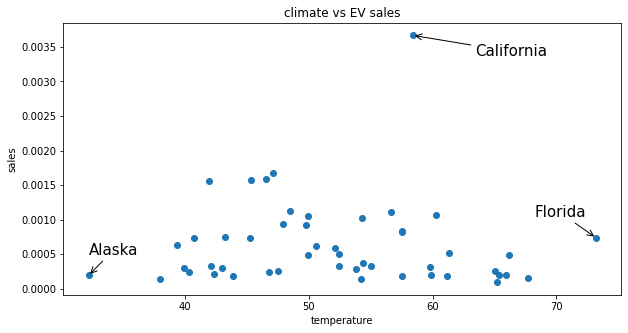

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.ticklabel_format(style='plain')
plt.scatter(df_climate_and_ev['temp'],df_climate_and_ev['EV_sale'])

plt.annotate(highest_sale, xy = (df_climate_and_ev.loc[highest_sale][['temp', 'EV_sale']]), xytext = df_climate_and_ev.loc[highest_sale][['temp', 'EV_sale']] +(+5, -0.0003), fontsize=15, 
            arrowprops=dict(arrowstyle='->')
            )
plt.annotate(highest_temp, xy = (df_climate_and_ev.loc[highest_temp][['temp', 'EV_sale']]), xytext = df_climate_and_ev.loc[highest_temp][['temp', 'EV_sale']] +(-5, +0.0003), fontsize=15, 
            arrowprops=dict(arrowstyle='->')
            )
plt.annotate(lowest_temp, xy = (df_climate_and_ev.loc[lowest_temp][['temp', 'EV_sale']]), xytext = df_climate_and_ev.loc[lowest_temp][['temp', 'EV_sale']] +(-0, +0.0003), fontsize=15, 
            arrowprops=dict(arrowstyle='->')
            )

plt.title("climate vs EV sales")
plt.xlabel("temperature")
plt.ylabel("sales")
plt.show()

We can see the aggregation of points in the diagram and the three outliers. we remove the outlier

In [8]:
df_climate_and_ev.loc[highest_sale][['temp', 'EV_sale']]

temp       58.400000
EV_sale     0.003667
Name: California, dtype: float64

In [9]:
df_climate_and_ev = df_climate_and_ev.drop(highest_sale)
df_climate_and_ev = df_climate_and_ev.drop(highest_temp)
df_climate_and_ev = df_climate_and_ev.drop(lowest_temp)

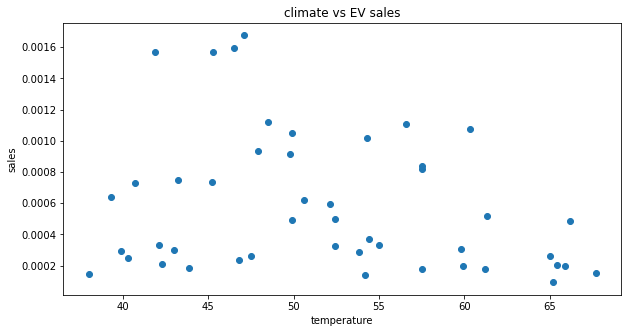

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.ticklabel_format(style='plain')
plt.scatter(df_climate_and_ev['temp'],df_climate_and_ev['EV_sale'])
plt.title("climate vs EV sales")
plt.xlabel("temperature")
plt.ylabel("sales")
plt.show()

#### We now have a scatter plot of the distribution of temperature and sales, but we can't easily see its trend yet

So we decided to add linear regression models to them

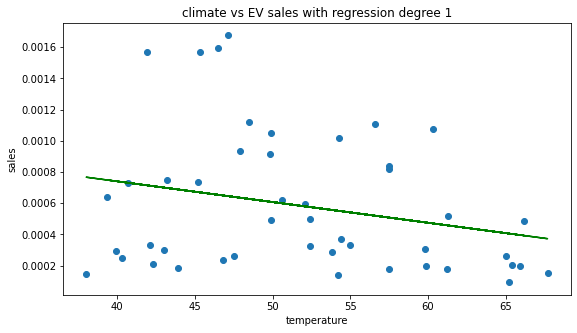

In [11]:
fig, ax = plt.subplots(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.title("climate vs EV sales with regression degree 1")
plt.xlabel("temperature")
plt.ylabel("sales")
parameter = np.polyfit(df_climate_and_ev['temp'], df_climate_and_ev['EV_sale'],1)
p = np.poly1d(parameter)
plt.scatter(df_climate_and_ev['temp'], df_climate_and_ev['EV_sale'])
plt.plot(df_climate_and_ev['temp'],p(df_climate_and_ev['temp']),color='g')

plt.show()

# Save as png image
fig.savefig('./Images/Climate_vs_EVsales_1.png', format='png')

The linear regression model with 1 degree is very difficult to see the changes, and the model with 2 degrees shows a slight trend but is very messy. So we decided to try a histogram to see if it was more obvious

In [12]:
df_climate_and_ev.head()

,temp,EV_sale
Massachusetts,48.5,0.001120
North Carolina,61.3,0.000520
Arkansas,61.2,0.000179
North Dakota,38.0,0.000147
Kansas,53.8,0.000289


In [13]:
df_climate_and_ev["temp"] = pd.to_numeric(df_climate_and_ev["temp"],errors='coerce')

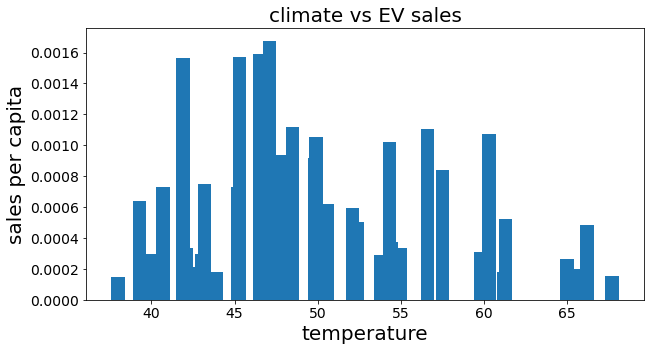

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(df_climate_and_ev['temp'],df_climate_and_ev['EV_sale'])
plt.title("climate vs EV sales", fontsize=20)
plt.xlabel("temperature",fontsize=20)
plt.ylabel("sales per capita", fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()
# Save as png image
fig.savefig('./Images/Climate_vs_EVsales_2.png', format='png')

We have created a bar chart for each temperature corresponding to its sales volume, and we will make a classification of the temperatures. Each corresponds to four classes: "cold, cool, warm, hot"

In [19]:
col = ['Climate','EV_sale']
df = pd.DataFrame(columns = col)
df['Climate'] =  ['cold','cool','warm','hot']
for index, row in df.iterrows():
    if df.iloc[index,0] == 'cold':
        df.iloc[index,1] = df_climate_and_ev[(df_climate_and_ev['temp']<= 40)]['EV_sale'].sum()
    if df.iloc[index,0] == 'cool':
        df.iloc[index,1] = df_climate_and_ev[((df_climate_and_ev['temp']>= 40) & (df_climate_and_ev['temp']<50))]['EV_sale'].sum()
    if df.iloc[index,0] == 'warm':
        df.iloc[index,1] = df_climate_and_ev[((df_climate_and_ev['temp']>= 50) & (df_climate_and_ev['temp']<60))]['EV_sale'].sum()
    if df.iloc[index,0] == 'hot':
        df.iloc[index,1] = df_climate_and_ev[((df_climate_and_ev['temp']>= 60) & (df_climate_and_ev['temp']<=70))]['EV_sale'].sum()
df.head()

,Climate,EV_sale
0,cold,0.001083
1,cool,0.014907
2,warm,0.007639
3,hot,0.003166


In [20]:
df

,Climate,EV_sale
0,cold,0.001083
1,cool,0.014907
2,warm,0.007639
3,hot,0.003166


In [21]:
df = df.set_index('Climate')

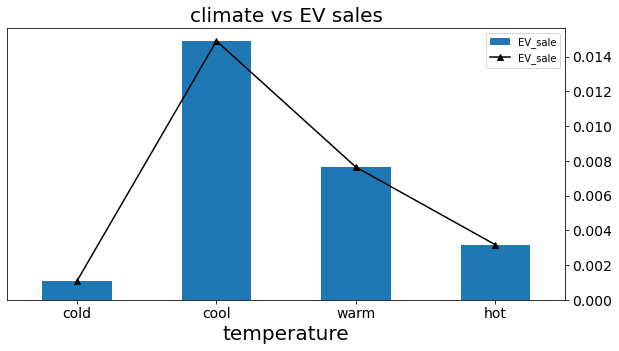

In [32]:
fig, ax = plt.subplots(figsize=(10, 5))
df.plot(kind='bar',ax=ax)
df.plot(kind='line', marker='^',ax=ax, color='black')
plt.title("climate vs EV sales",fontsize=20)
plt.xlabel("temperature",fontsize=20)

ax.yaxis.tick_right()

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Save as png image
fig.savefig('./Images/Climate_vs_EVsales_3.png', format='png')

## Conclusion

What surprised me was that car sales were highest in cooler temperatures rather than warmer. People in colder regions are reluctant to buy electric cars